In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/ANZ synthesised transaction dataset.xlsx')

In [ ]:
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [ ]:
df.shape

(12043, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [ ]:
df.isna().sum()/len(df)*100

status                0.000000
card_present_flag    35.921282
bpay_biller_code     92.651333
account               0.000000
currency              0.000000
long_lat              0.000000
txn_description       0.000000
merchant_id          35.921282
merchant_code        92.667940
first_name            0.000000
balance               0.000000
date                  0.000000
gender                0.000000
age                   0.000000
merchant_suburb      35.921282
merchant_state       35.921282
extraction            0.000000
amount                0.000000
transaction_id        0.000000
country               0.000000
customer_id           0.000000
merchant_long_lat    35.921282
movement              0.000000
dtype: float64

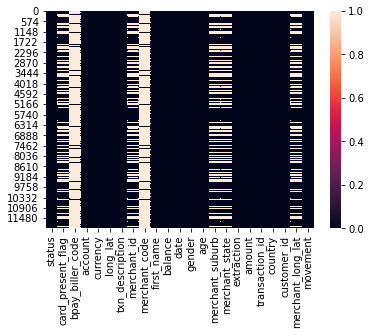

In [ ]:
sns.heatmap(df.isna())

In [ ]:
df.status.value_counts()

authorized    7717
posted        4326
Name: status, dtype: int64

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64
--------------------------------------------------


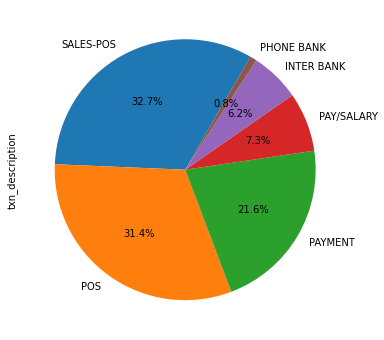

In [ ]:
print(df['txn_description'].value_counts())
print('-'*50)
df['txn_description'].value_counts().plot.pie(figsize=(6,6),autopct='%1.1f%%', startangle=60)

NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


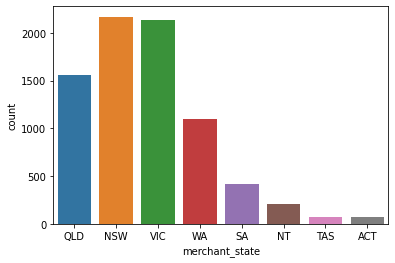

In [ ]:
print(df['merchant_state'].value_counts())
sns.countplot(df['merchant_state'])
plt.show()

In [ ]:
df['movement'].value_counts()

debit     11160
credit      883
Name: movement, dtype: int64

In [ ]:
df.date=pd.to_datetime(df.date)

In [ ]:
#getting the weekday out of date column
df['week_day'] = df['date'].dt.day_name()
df['week_day'].value_counts()

Friday       2073
Wednesday    2063
Thursday     1801
Saturday     1709
Sunday       1550
Tuesday      1487
Monday       1360
Name: week_day, dtype: int64

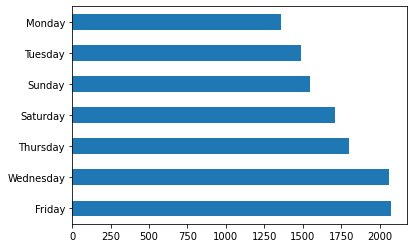

In [ ]:
df['week_day'].value_counts().plot.barh()

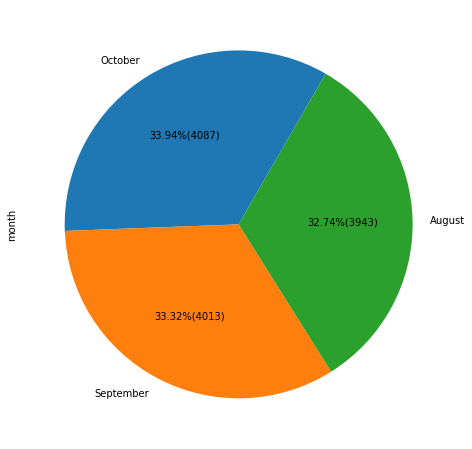

In [ ]:
#extracting the month out of date column
df['month'] = df['date'].dt.month_name()
month = df.groupby('month').size()
df['month'].value_counts().plot.pie(figsize=[8,8],autopct=lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*month.sum()),startangle=60)
plt.show()

Gender

card_present_flag  gender
0.0                M          763
                   F          760
1.0                F         3102
                   M         3092
Name: gender, dtype: int64


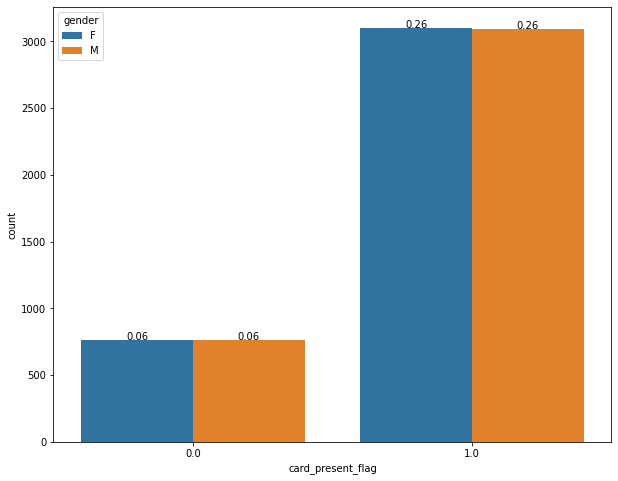

In [ ]:
print(df.groupby(df['card_present_flag'])['gender'].value_counts())
plt.figure(figsize=(10,8))
ax=sns.countplot(x='card_present_flag' ,hue='gender', data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/len(df)),
            ha="center") 

month      gender
August     M         2044
           F         1899
October    M         2149
           F         1938
September  M         2092
           F         1921
Name: gender, dtype: int64


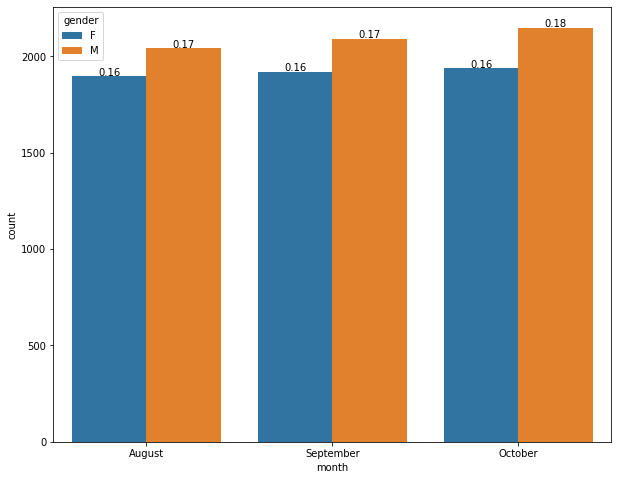

In [ ]:
print(df.groupby(df['month'])['gender'].value_counts())
plt.figure(figsize=(10,8))
ax=sns.countplot(x='month' ,hue='gender', data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/len(df)),
            ha="center") 

merchant_state  gender
ACT             F           46
                M           27
NSW             M         1189
                F          980
NT              F          200
                M            5
QLD             F          800
                M          756
SA              F          245
                M          170
TAS             M           52
                F           16
VIC             M         1213
                F          918
WA              F          657
                M          443
Name: gender, dtype: int64


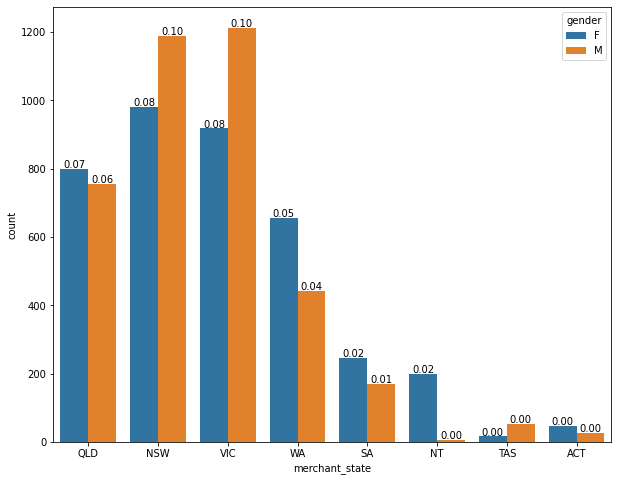

In [ ]:
print(df.groupby(df['merchant_state'])['gender'].value_counts())
plt.figure(figsize=(10,8))
ax=sns.countplot(x='merchant_state' ,hue='gender', data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/len(df)),
            ha="center")

week_day   gender
Friday     M         1038
           F         1035
Monday     M          686
           F          674
Saturday   M          872
           F          837
Sunday     M          832
           F          718
Thursday   M          998
           F          803
Tuesday    M          764
           F          723
Wednesday  M         1095
           F          968
Name: gender, dtype: int64


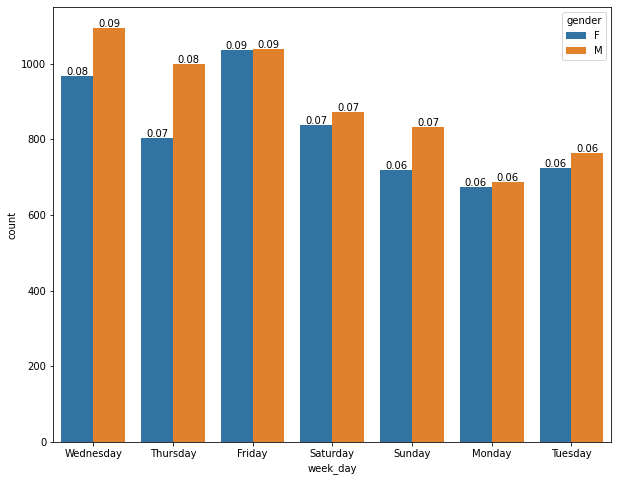

In [ ]:
print(df.groupby(df['week_day'])['gender'].value_counts())
plt.figure(figsize=(10,8))
ax=sns.countplot(x='week_day' ,hue='gender', data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/len(df)),
            ha="center")

movement  gender
credit    M          464
          F          419
debit     M         5821
          F         5339
Name: gender, dtype: int64


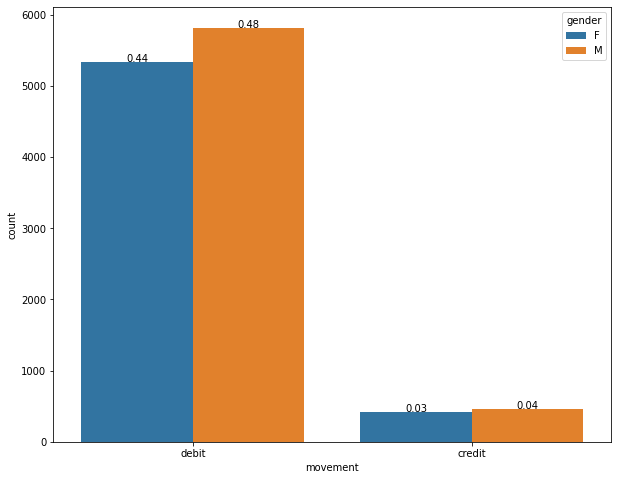

In [ ]:
print(df.groupby(df['movement'])['gender'].value_counts())
plt.figure(figsize=(10,8))
ax=sns.countplot(x='movement' ,hue='gender', data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/len(df)),
            ha="center")

txn_description  movement
INTER BANK       debit        742
PAY/SALARY       credit       883
PAYMENT          debit       2600
PHONE BANK       debit        101
POS              debit       3783
SALES-POS        debit       3934
Name: movement, dtype: int64
********************
txn_description  movement
INTER BANK       debit        6.2
PAY/SALARY       credit       7.3
PAYMENT          debit       21.6
PHONE BANK       debit        0.8
POS              debit       31.4
SALES-POS        debit       32.7
Name: movement, dtype: float64


<Figure size 720x576 with 0 Axes>

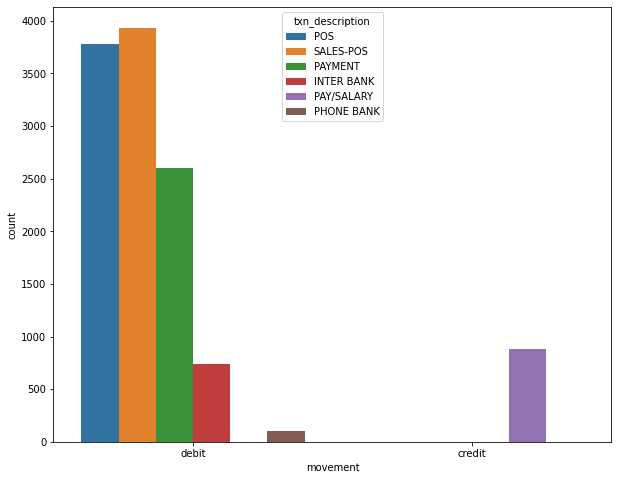

In [ ]:
print(df['movement'].groupby(df["txn_description"]).value_counts())
print("*"*20)
print(((df['movement'].groupby(df['txn_description']).value_counts() / len(df['txn_description'])).round(3)*100))
plt.figure(figsize=(10,8))
plt.figure(figsize=(10,8))
ax=sns.countplot(x='movement' ,hue='txn_description', data=df)


movement  merchant_state
debit     NSW               2169
          VIC               2131
          QLD               1556
          WA                1100
          SA                 415
          NT                 205
          ACT                 73
          TAS                 68
Name: merchant_state, dtype: int64


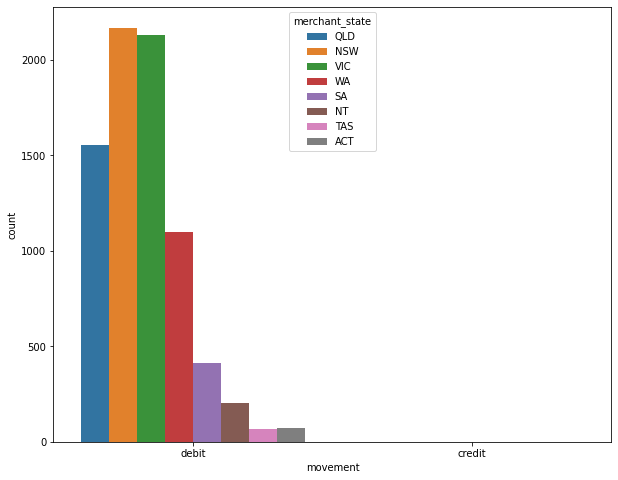

In [ ]:
print(df.groupby(df['movement'])['merchant_state'].value_counts())
plt.figure(figsize=(10,8))
ax=sns.countplot(x='movement' ,hue='merchant_state', data=df)


**Observation**
* Equal no of Male and Female have or have not card during Transactions.
* In October Highest transactions occured & Male Customers are more .
* NSW, NT, VIC states has high Male customers in ratio compare to Female
* Maximum debit transactions were made by male customers.
* Week day wise maximum transaction were made by Male customers

Numerical

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


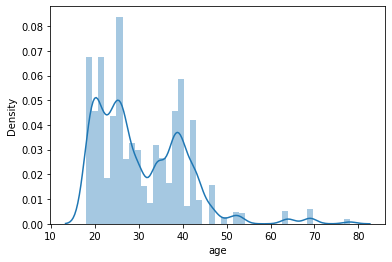

In [ ]:
sns.distplot(df.age)

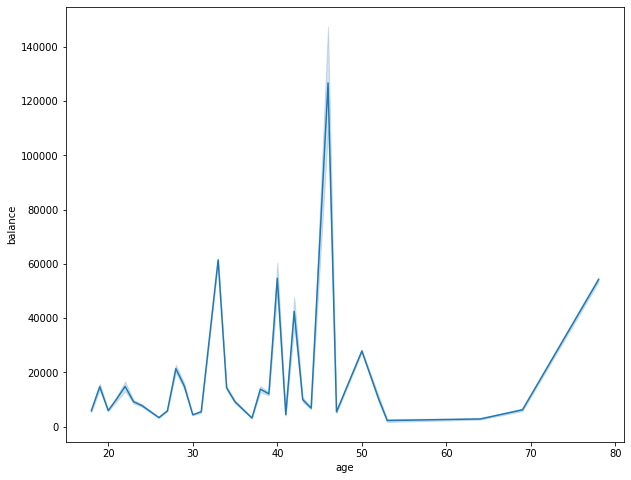

In [ ]:
# Figuring out which age group has more balance.
plt.figure(figsize=(10,8))
sns.lineplot(x='age' , y='balance' , data=df)

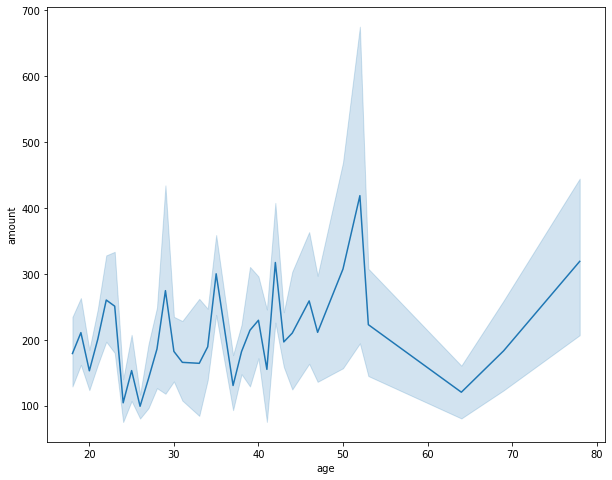

In [ ]:
# Figuring out which age group has more Transactions.
plt.figure(figsize=(10,8))
sns.lineplot(x='age' , y='amount' , data=df)

**Observation**
* Age data is right skewed and contains outliers.
* 40 - 50 age group has more balace.
* 45 - 55 age group has maximum transactions.